In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Creating a Google Colaboratory File (.ipynb extension)
# - Create a new Google Colab notebook.

# Step 2: Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb


In [ ]:
# Step 3: Perform Exploratory Data Analysis (EDA)
# Load the dataset from the provided URL
url = '/content/drive/MyDrive/insurance.csv'
data = pd.read_csv(url)
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


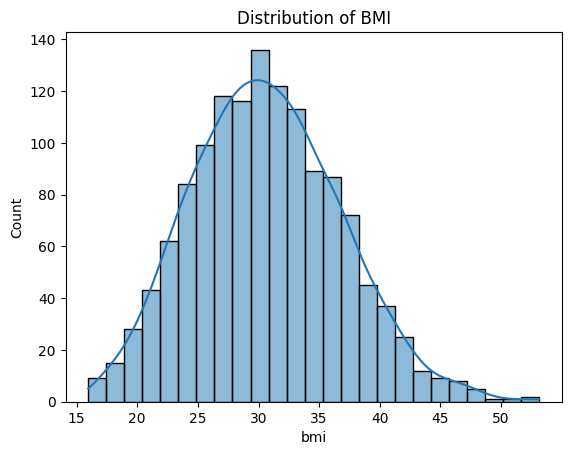

' BMI 30 olan kısımda aykırı değer mevcuttur. Bunun dışında elde edilen grafik dağılım grafiğine uygun şekilde oluşturulmuştur. '

In [ ]:
# Examine distribution of BMI
sns.histplot(data['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.show()

""" BMI 30 olan kısımda aykırı değer mevcuttur. Bunun dışında elde edilen grafik dağılım grafiğine uygun şekilde oluşturulmuştur. """


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


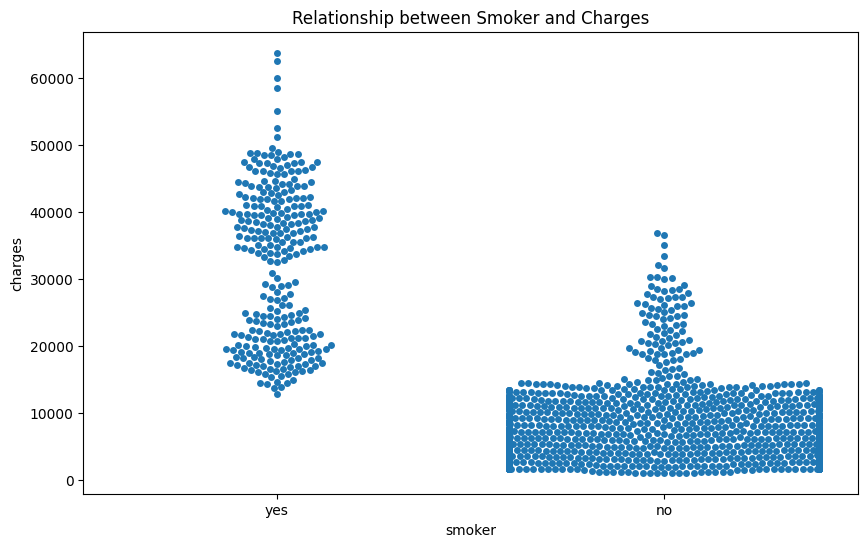

'Genelde sigara içenlerin masrafının içmeyenlere göre daha fazla olduğu görülmüştür. '

In [ ]:
# Examine relationship between "smoker" and "charges" using a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='smoker', y='charges', data=data)
plt.title("Relationship between Smoker and Charges")
plt.show()

"""Genelde sigara içenlerin masrafının içmeyenlere göre daha fazla olduğu görülmüştür. """


<ipython-input-61-ec4518124e33>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='charges', ci=None, data=data)


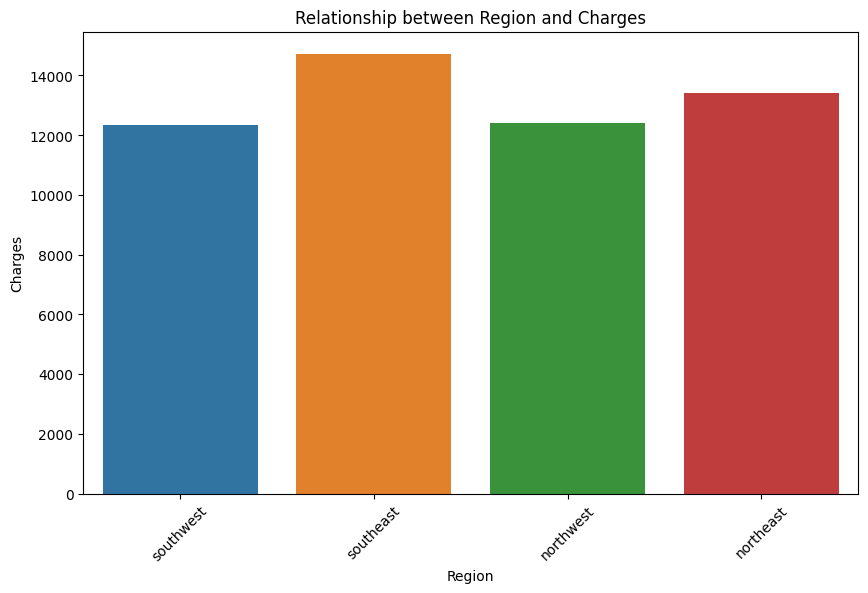

' Bu grafiğe göre en masraflı bölge Güneydoğu iken en masrafsızı Güneybatıdır.'

In [ ]:
# Examine relationship between "region" and "charges" using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', ci=None, data=data)
plt.title("Relationship between Region and Charges")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()
""" Bu grafiğe göre en masraflı bölge Güneydoğu iken en masrafsızı Güneybatıdır."""

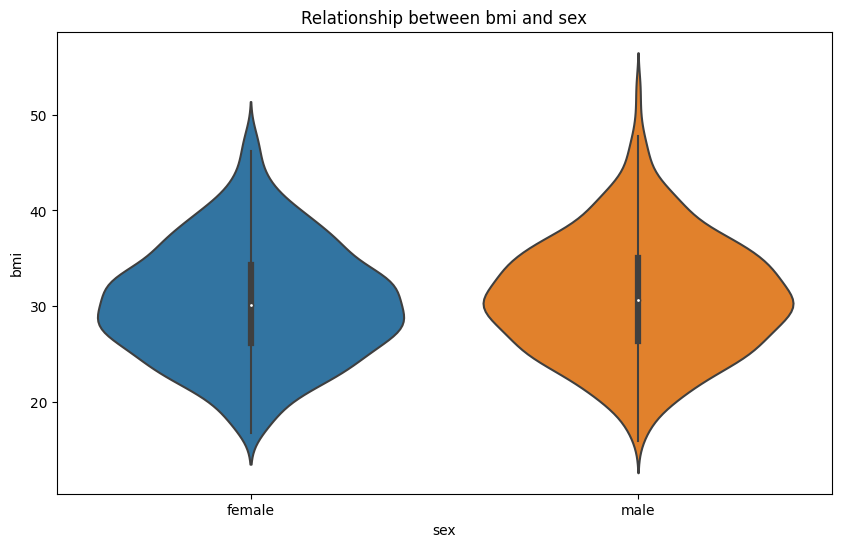

' Bu grafiğe göre beden kitle indeksi erkeklerde kadınlara oranla daha fazladır.'

In [ ]:
# Examine relationship between "bmi" and "sex" using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['sex'], y=data['bmi'])
plt.title("Relationship between bmi and sex")
plt.show()
""" Bu grafiğe göre beden kitle indeksi erkeklerde kadınlara oranla daha fazladır."""

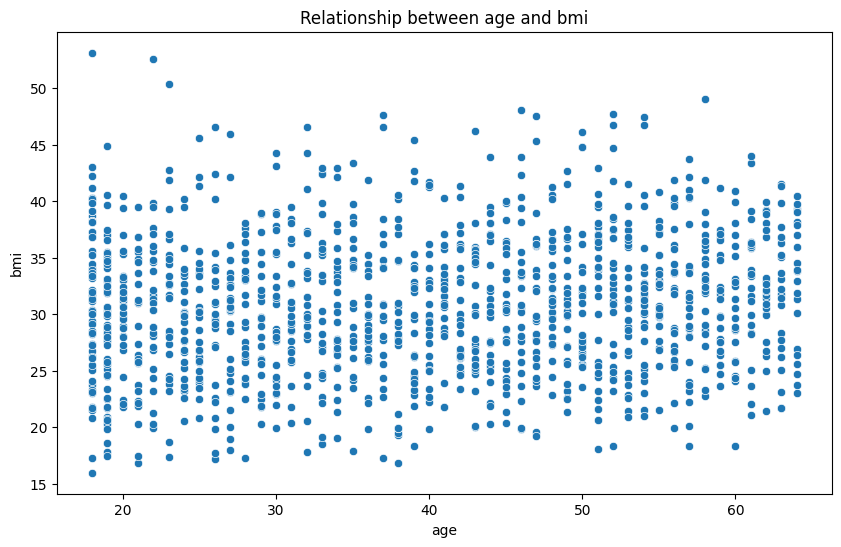

' Bu grafiğe göre yaş ile beden kitle indeksi arasında doğrudan bir ilişki yoktur. '

In [ ]:
# Examine relationship between "age" and "bmi" using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['bmi'])
plt.title("Relationship between age and bmi")
plt.show()
""" Bu grafiğe göre yaş ile beden kitle indeksi arasında doğrudan bir ilişki yoktur. """

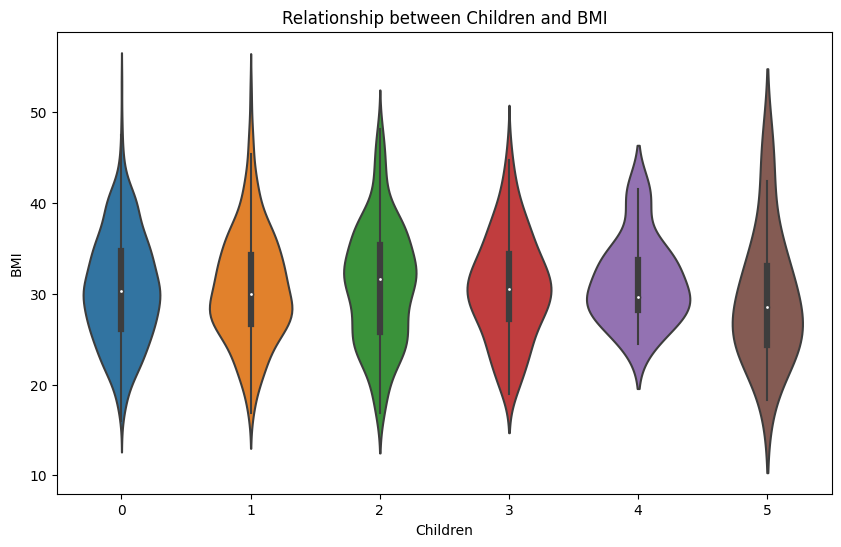

' Bu grafiğe göre hiç çocuğu olmayan ve 1 çocuğu olanlar daha dar bir bmi aralığındayken 4, 5 çocuğu olanlar daha geniş bir aralığı kapsamaktadır. '

In [ ]:
# Examine relationship between "bmi" and "children" using a scatter plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='children', y='bmi', data=data)
plt.title("Relationship between Children and BMI")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()
""" Bu grafiğe göre hiç çocuğu olmayan ve 1 çocuğu olanlar daha dar bir bmi aralığındayken 4, 5 çocuğu olanlar daha geniş bir aralığı kapsamaktadır. """

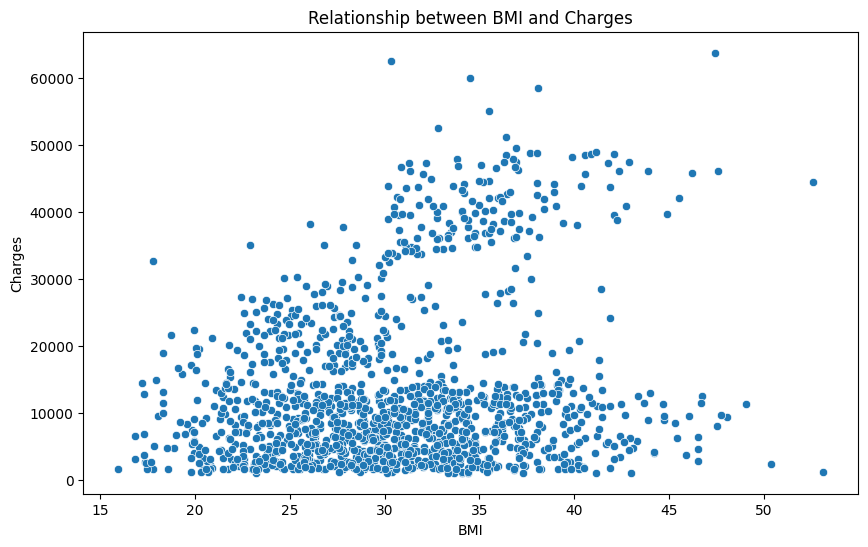

' Bu grafiğe göre genel olarak beden kitle indeksi arttıkça yapılan masraflarda artmaktadır.'

In [ ]:
# Examine relationship between "bmi" and "charges" using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()
""" Bu grafiğe göre genel olarak beden kitle indeksi arttıkça yapılan masraflarda artmaktadır."""

<ipython-input-66-6759a01e261f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='bmi', hue='smoker', ci = None, data=data)


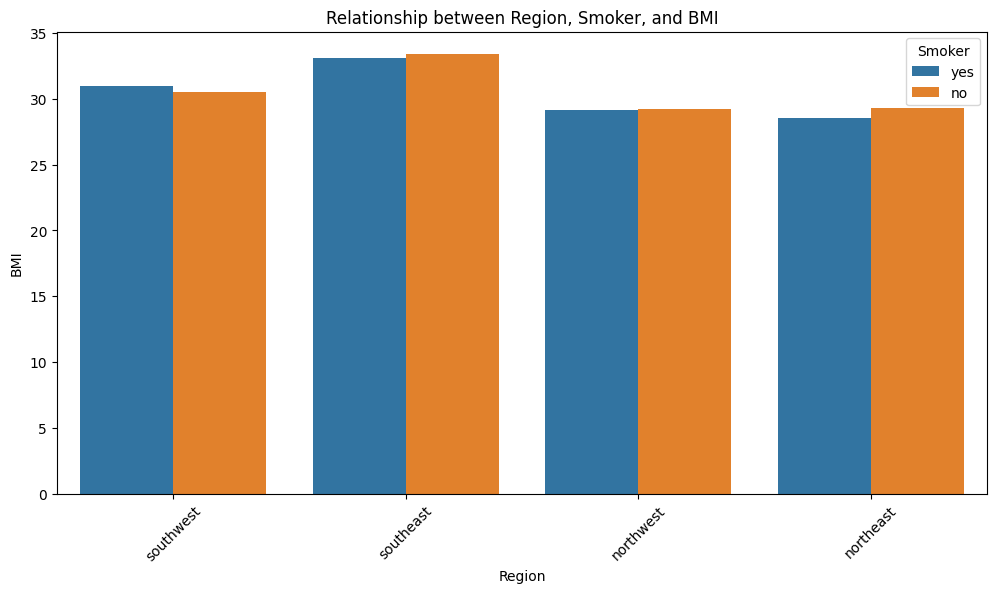

" Bu grafiğe göre bölgelere göre sigara içen kişi sayısı Güneybatı'da içmeyenlere göre daha fazlayken\n Güney doğuda ise toplam sigara içicilik durumuna göre fazla sayıda olan kişilerin beden kitle indeksi en büyüktür. "

In [ ]:
# Examine relationship between "region", "smoker", and "bmi" using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='bmi', hue='smoker', ci = None, data=data)
plt.title("Relationship between Region, Smoker, and BMI")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()
""" Bu grafiğe göre bölgelere göre sigara içen kişi sayısı Güneybatı'da içmeyenlere göre daha fazlayken
 Güney doğuda ise toplam sigara içicilik durumuna göre fazla sayıda olan kişilerin beden kitle indeksi en büyüktür. """

In [ ]:
# Step 4: Data Preprocessing
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['region'], drop_first=True)
"""Buraya kadar olan kısımda kategorik değişkenleri sayısala çevirme işlemleri yapıldı. """

# Split dataset into X and y
X = data.drop(columns=['charges'])
y = data['charges']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
""" burada veri kümesini eğittik."""

# Scale the dataset using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
""" Uyum ve algoritma performansı açısından ölçeklendirme yapıldı. """

In [ ]:
# Step 5: Model Selection
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVM', SVR()),
    ('XGBoost', xgb.XGBRegressor())
]
best_model = None
best_score = float('inf')

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_rmse = np.sqrt(-scores.mean())

    if avg_rmse < best_score:
        best_score = avg_rmse
        best_model = model

print(f"Best performing model: {best_model}")

""" Burada en iyi performans gösteren model ortalama rmse değerine göre bulunur. """

Best performing model: RandomForestRegressor()


' Burada en iyi performans gösteren model ve bunların or'

In [ ]:
# Step 6: Hyper-parameter Optimization
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"Best model after hyper-parameter optimization: {best_model}")

""" Burada algoritma performanslarını iyileştirmek için hiperparametre ayarları yapıldı. """

Best model after hyper-parameter optimization: RandomForestRegressor(min_samples_leaf=4, min_samples_split=10)


In [ ]:
# Step 7: Model Evaluation
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(y_test, y_pred)
avg_rmse = np.mean(rmse)
print(f"Root Mean Squared Error Average: {avg_rmse}")
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

""" Burada algoritmaların performansları ölçülür """

Root Mean Squared Error Average: 102.6734591460331
R^2 Score: 0.8769769147278732
Mean Squared Error: 19099177.932701964
Mean Absolute Error: 2495.015098089832
